In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the Data

In [ ]:
from keras.datasets import cifar10
(X_train_full, y_train_full), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [ ]:
X_train_full.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [ ]:
X_val = X_train_full[-10_000:]
y_val = y_train_full[-10_000:]
X_train = X_train_full[:-10_000]
y_train = y_train_full[:-10_000]

In [ ]:
X_val.shape, X_train.shape

((10000, 32, 32, 3), (40000, 32, 32, 3))

In [ ]:
y_train.shape

(40000, 1)

In [ ]:
X_train[0].shape

(32, 32, 3)

# Step 2: Visualize


In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship','truck']
import matplotlib.pyplot as plt

def plot_figures(X, y, n_rows=4, n_cols=10):
    plt.figure(figsize=(n_cols*1.2, n_rows*1.2))
    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols*row + col
            plt.subplot(n_rows, n_cols, index+1)
            plt.imshow(X[index])
            plt.title(class_names[y[index,0]])
            plt.axis('off')

# Step 3: Build a Model

In [ ]:
def get_model():
  model = tf.keras.Sequential([
      tf.keras.layers.Input(shape=(32, 32, 3)),
      tf.keras.layers.Rescaling(scale=1./255),
      tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"),
      tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"),

      tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

      tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"),
      tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"),

      tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(units=128, activation="relu"),
      tf.keras.layers.Dense(units=10, activation="softmax")
  ])

  return model

In [ ]:
model = get_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 32, 32, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                        

# Step 4: Compile the Model

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Step 5: Train the Model

In [ ]:
escb = tf.keras.callbacks.EarlyStopping(patience=5)
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32, callbacks=[escb])

Epoch 1/100
1250/1250 [==============================] - 12s 5ms/step - loss: 1.4632 - accuracy: 0.4690 - val_loss: 1.1823 - val_accuracy: 0.5689
Epoch 2/100
1250/1250 [==============================] - 6s 5ms/step - loss: 1.0072 - accuracy: 0.6449 - val_loss: 0.9118 - val_accuracy: 0.6796
Epoch 3/100
1250/1250 [==============================] - 6s 5ms/step - loss: 0.8192 - accuracy: 0.7123 - val_loss: 0.8477 - val_accuracy: 0.7043
Epoch 4/100
1250/1250 [==============================] - 7s 6ms/step - loss: 0.6913 - accuracy: 0.7574 - val_loss: 0.7883 - val_accuracy: 0.7325
Epoch 5/100
1250/1250 [==============================] - 6s 5ms/step - loss: 0.5828 - accuracy: 0.7972 - val_loss: 0.8085 - val_accuracy: 0.7259
Epoch 6/100
1250/1250 [==============================] - 7s 5ms/step - loss: 0.4898 - accuracy: 0.8279 - val_loss: 0.8024 - val_accuracy: 0.7401
Epoch 7/100
1250/1250 [==============================] - 6s 5ms/step - loss: 0.3966 - accuracy: 0.8585 - val_loss: 0.8830 - val_a

In [ ]:
def plot_learning_curves(history):
  plt.figure(figsize=(8, 5))
  for key, style in zip(history.history, ["r-o", "r-*", "b-o", "b-*"]):
    epochs = np.array (history.epoch)
    plt.plot(epochs + 1, history.history [key], style, label=key)
  plt.xlabel("Epoch")
  plt.axis([1, len(history.history['loss']), 0., 1])
  plt.legend(loc="lower left")
  plt.grid()

# Step 6: Evaluate the Model

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.1532 - accuracy: 0.7110


[1.1531898975372314, 0.7110000252723694]

In [ ]:
predictions = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
predicted_all = [np.argmax(x) for x in predictions]
predicted_all[:5]

[3, 8, 0, 0, 6]

In [ ]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [ ]:
incorrect = [X_test[idx] for idx, x in enumerate(predicted_all) if x != y_test[idx]]
predicted = [predicted_all[idx] for idx, x in enumerate(predicted_all) if x != y_test[idx]]
expected = [y_test[idx] for idx, x in enumerate(predicted_all) if x != y_test[idx]]

incorrect = np.array(incorrect)
predicted = np.array(predicted).reshape(-1, 1)
expected = np.array(expected)

In [ ]:
incorrect.shape, predicted.shape, expected.shape

((2890, 32, 32, 3), (2890, 1), (2890, 1))

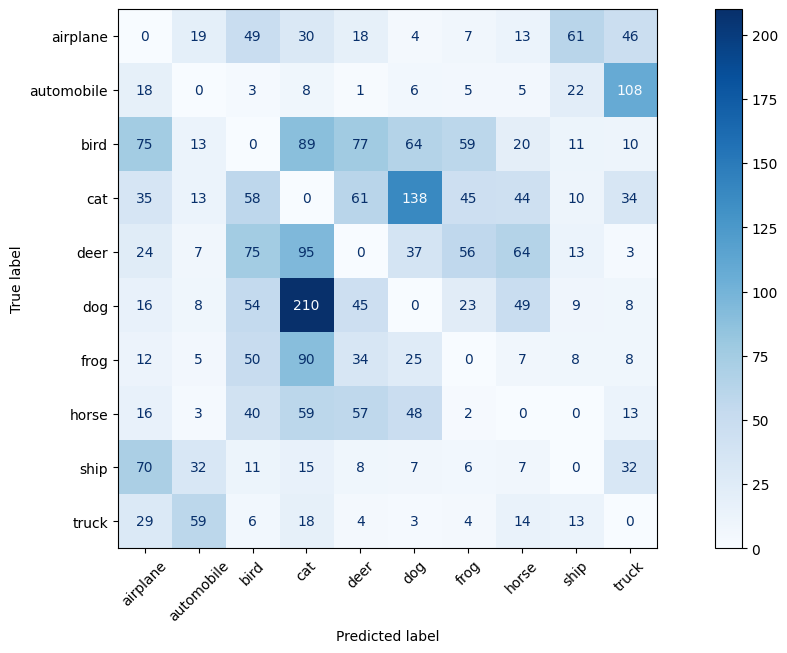

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

fig, ax = plt.subplots(figsize=(15, 7))
cm = confusion_matrix(expected, predicted)
disp = ConfusionMatrixDisplay(cm, display_labels=class_names)
disp.plot(ax=ax, cmap='Blues')
ax.xaxis.set_ticklabels(class_names, rotation=45)
plt.show()

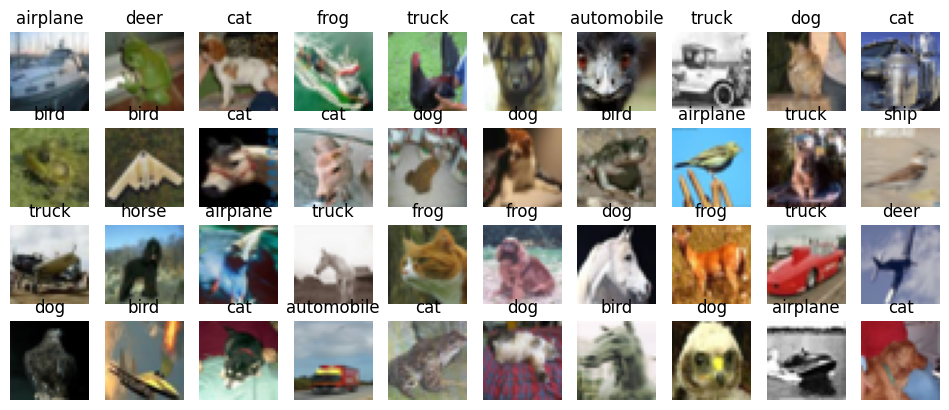

In [ ]:
plot_figures(incorrect, predicted, n_rows=4, n_cols=10)

# Step 7: Improving the model

In [ ]:
def get_model2():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Rescaling(scale=1./255, input_shape=(32, 32, 3)))

    model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, kernel_initializer=tf.keras.initializers.HeNormal(), padding='same', activation='relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(0.25))

    model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, kernel_initializer=tf.keras.initializers.HeNormal(), padding='same', activation='relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPool2D(pool_size=2))

    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, kernel_initializer=tf.keras.initializers.HeNormal(), padding='same', activation='relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(0.25))

    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, kernel_initializer=tf.keras.initializers.HeNormal(), padding='same', activation='relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPool2D(pool_size=2))
    ###
    # additional convolutional block
    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, kernel_initializer=tf.keras.initializers.HeNormal(), padding='same', activation='relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(0.25))

    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, kernel_initializer=tf.keras.initializers.HeNormal(), padding='same', activation='relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPool2D(pool_size=2))
    ###
    model.add(tf.keras.layers.Flatten())

    model.add(tf.keras.layers.Dense(units=128, kernel_initializer=tf.keras.initializers.HeNormal(), activation='relu'))
    model.add(tf.keras.layers.Dense(units=10, activation='softmax'))
    return model

In [ ]:
model2 = get_model2()
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 32, 32, 3)         0         
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                     

In [ ]:
def learning_rate_scheduler(epoch):
    initial_lr = 0.001
    drop = 0.5
    epochs_drop = 10.0
    lr = initial_lr * np.power(drop, np.floor((1+epoch)/epochs_drop))
    return lr

In [ ]:
model2.compile(
    loss="sparse_categorical_crossentropy",
    metrics="accuracy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)
)

In [ ]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True, min_delta=0.001)
lr_scheduler_cb = tf.keras.callbacks.LearningRateScheduler(learning_rate_scheduler)

history = model2.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping_cb, lr_scheduler_cb])

Epoch 1/100
1250/1250 [==============================] - 16s 9ms/step - loss: 1.4515 - accuracy: 0.4757 - val_loss: 1.2043 - val_accuracy: 0.5677 - lr: 0.0010
Epoch 2/100
1250/1250 [==============================] - 11s 8ms/step - loss: 1.0124 - accuracy: 0.6411 - val_loss: 0.8928 - val_accuracy: 0.6828 - lr: 0.0010
Epoch 3/100
1250/1250 [==============================] - 11s 9ms/step - loss: 0.8206 - accuracy: 0.7102 - val_loss: 0.7755 - val_accuracy: 0.7274 - lr: 0.0010
Epoch 4/100
1250/1250 [==============================] - 11s 9ms/step - loss: 0.7127 - accuracy: 0.7498 - val_loss: 0.8901 - val_accuracy: 0.6896 - lr: 0.0010
Epoch 5/100
1250/1250 [==============================] - 11s 9ms/step - loss: 0.6377 - accuracy: 0.7762 - val_loss: 0.6711 - val_accuracy: 0.7700 - lr: 0.0010
Epoch 6/100
1250/1250 [==============================] - 11s 9ms/step - loss: 0.5737 - accuracy: 0.7975 - val_loss: 0.6573 - val_accuracy: 0.7841 - lr: 0.0010
Epoch 7/100
1250/1250 [=======================

In [ ]:
model2.evaluate(X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.6152 - accuracy: 0.8119


[0.615227222442627, 0.8119000196456909]